In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
50000


In [ ]:
df.replace({'positive':1, 'negative':0}, inplace=True)

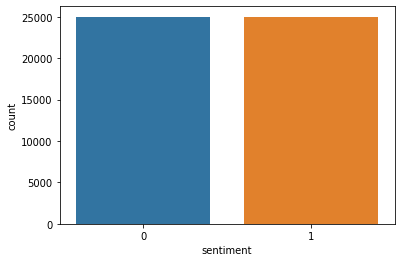

In [ ]:
sns.countplot(x='sentiment', data=df)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
X = df['review']
y=df['sentiment']
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

DATA CLEANING

In [ ]:
def remove_html_tags(text):
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, ' ', text)
    return cleantext
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text=re.sub("\s\s+" , " ", text)
    text=text.lower()
    return text
def preprocess_review(text):
    clean_text = remove_html_tags(text);
    clean_text = remove_between_square_brackets(clean_text);
    clean_text = remove_special_characters(clean_text)
    return clean_text;

On applique le nettoyage des données a tout notre dataset

In [ ]:
df['review'] = df['review'].apply(lambda x: preprocess_review(x))

DATA POCESSING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('label: ', label.numpy())

text:  b'i figure this to be an alternate reality teen flickmore precisely a ferris bueller type character as the leader of a cheat ring yeah i know its not meant to compared to ferris bueller at least not in a orangestooranges way but it will nonetheless bottomline its galaxies away from even being even a minor classic it is watchable though only if youre not expecting very much that said the main character has some charm but the premise wears thin because the writing just isnt clever the movie just did not deliver enough laughs twists or tension to keep my interest to be honest i did continue watchingwatching with hopes to see if anything suddenly clicked it didnt so stylish as it is i wouldnt recommend this movie btw it seems odd to see mary tyler moore as the principal shes truly miscast i hope the paycheck was inordinately big'
label:  0


In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(5000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(500).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:1])
    print()
    print('labels: ', label.numpy()[:1])

texts:  [b'i can safely admit as an imdb geek that phantom lady will never crack into my film noir top twenty it may not even sneak into the top fifty but rather than discredit the film for not being as good as so many other classics of the film noir genre it should be noted that phantom lady has enough strong and lasting images in it to make it a worthwhile viewing all that is required from the viewer is the ability to get beyond the dreadfully slow beginning the film doesnt get cooking until kansas ella raines sets about trying to prove all but single handedly the innocence of her boss scott anderson alan curtis who has been convicted of murder kansas is andersons secretary by day and amateur detective by night as the novice sleuth she does quite well for herself while working the streets of new york at night little by little she starts putting pieces of a murder mystery puzzle together to be honest the film belongs to raines and it is only due to her presence that the film works wel

In [ ]:
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization()


In [ ]:
encoder.adapt(train_dataset.map(lambda text, label: text)) #signifie que dans train_dataset, on va recuperer que le text 

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:50]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film',
       'on', 'not', 'you', 'are', 'his', 'have', 'be', 'one', 'he', 'its',
       'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like',
       'just', 'or', 'her', 'about', 'if', 'out', 'has', 'some', 'there',
       'what', 'good'], dtype='<U72')

In [ ]:
encoded_example = encoder('example')[:3].numpy()
encoded_example

array([[  10,   68, 6355, ...,    0,    0,    0],
       [  43, 8479, 7049, ...,    0,    0,    0],
       [   4,  163,    5, ...,    0,    0,    0]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [ ]:
#model = Sequential()
#model.add(Embedding(len(vocab),200))
#model.add(LSTM(50,activation='relu'))

#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
#model.summary()

In [ ]:
model.fit(train_dataset, epochs=2, validation_data=(X_test,y_test))

Epoch 1/2
1172/1172 [==============================] - 386s 291ms/step - loss: 0.5305 - accuracy: 0.6938 - val_loss: 0.2498 - val_accuracy: 0.8972
Epoch 2/2
1172/1172 [==============================] - 336s 287ms/step - loss: 0.1889 - accuracy: 0.9304 - val_loss: 0.2417 - val_accuracy: 0.9026


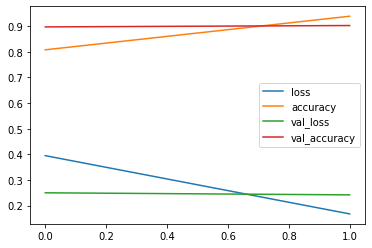

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from tensorflow.keras.models import load_model
model.save('Movie_classification',save_format='tf')

INFO:tensorflow:Assets written to: Movie_classification/assets


INFO:tensorflow:Assets written to: Movie_classification/assets


In [ ]:
examples = [
  "The movie was great, i would recommend this movie to my family, the storyline is amazing"
]

model.predict(examples)

array([[0.92490935]], dtype=float32)